# Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

-Which variables are significant in predicting the price of a car
-How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal mar

# Business Goal
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1.Understanding the data ##


In [2]:
car=pd.read_csv('C:/Users/User/Desktop/datascience/carprice.csv')
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
cars=car.select_dtypes(include=['float64','int64'])
cars.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# dropping symboling and car_ID as symboling is more of categorical variable as described before and car_ID is only 
#an index type variable and not a predictor
cars= car.drop(['symboling', 'car_ID'], axis=1)
cars.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [6]:
car['stroke'].astype('category').value_counts()

3.400    20
3.030    14
3.150    14
3.230    14
3.390    13
2.640    11
3.290     9
3.350     9
3.460     8
3.110     6
3.190     6
3.270     6
3.410     6
3.500     6
3.580     6
3.070     6
3.520     5
3.640     5
3.470     4
3.255     4
3.540     4
3.860     4
3.900     3
2.900     3
3.080     2
4.170     2
3.100     2
2.190     2
2.680     2
2.800     2
2.360     1
3.210     1
2.760     1
2.870     1
3.120     1
3.160     1
2.070     1
Name: stroke, dtype: int64

In [7]:
car['carbody'].astype('category').value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

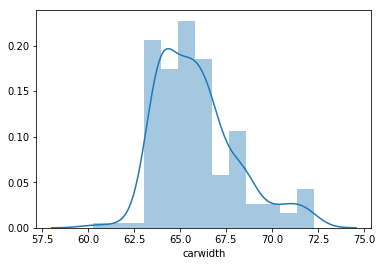

In [8]:
sns.distplot(car['carwidth'])
plt.show()

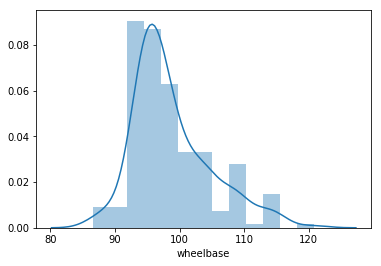

In [9]:
sns.distplot(car['wheelbase'])
plt.show()

## 2.Visualising the Data

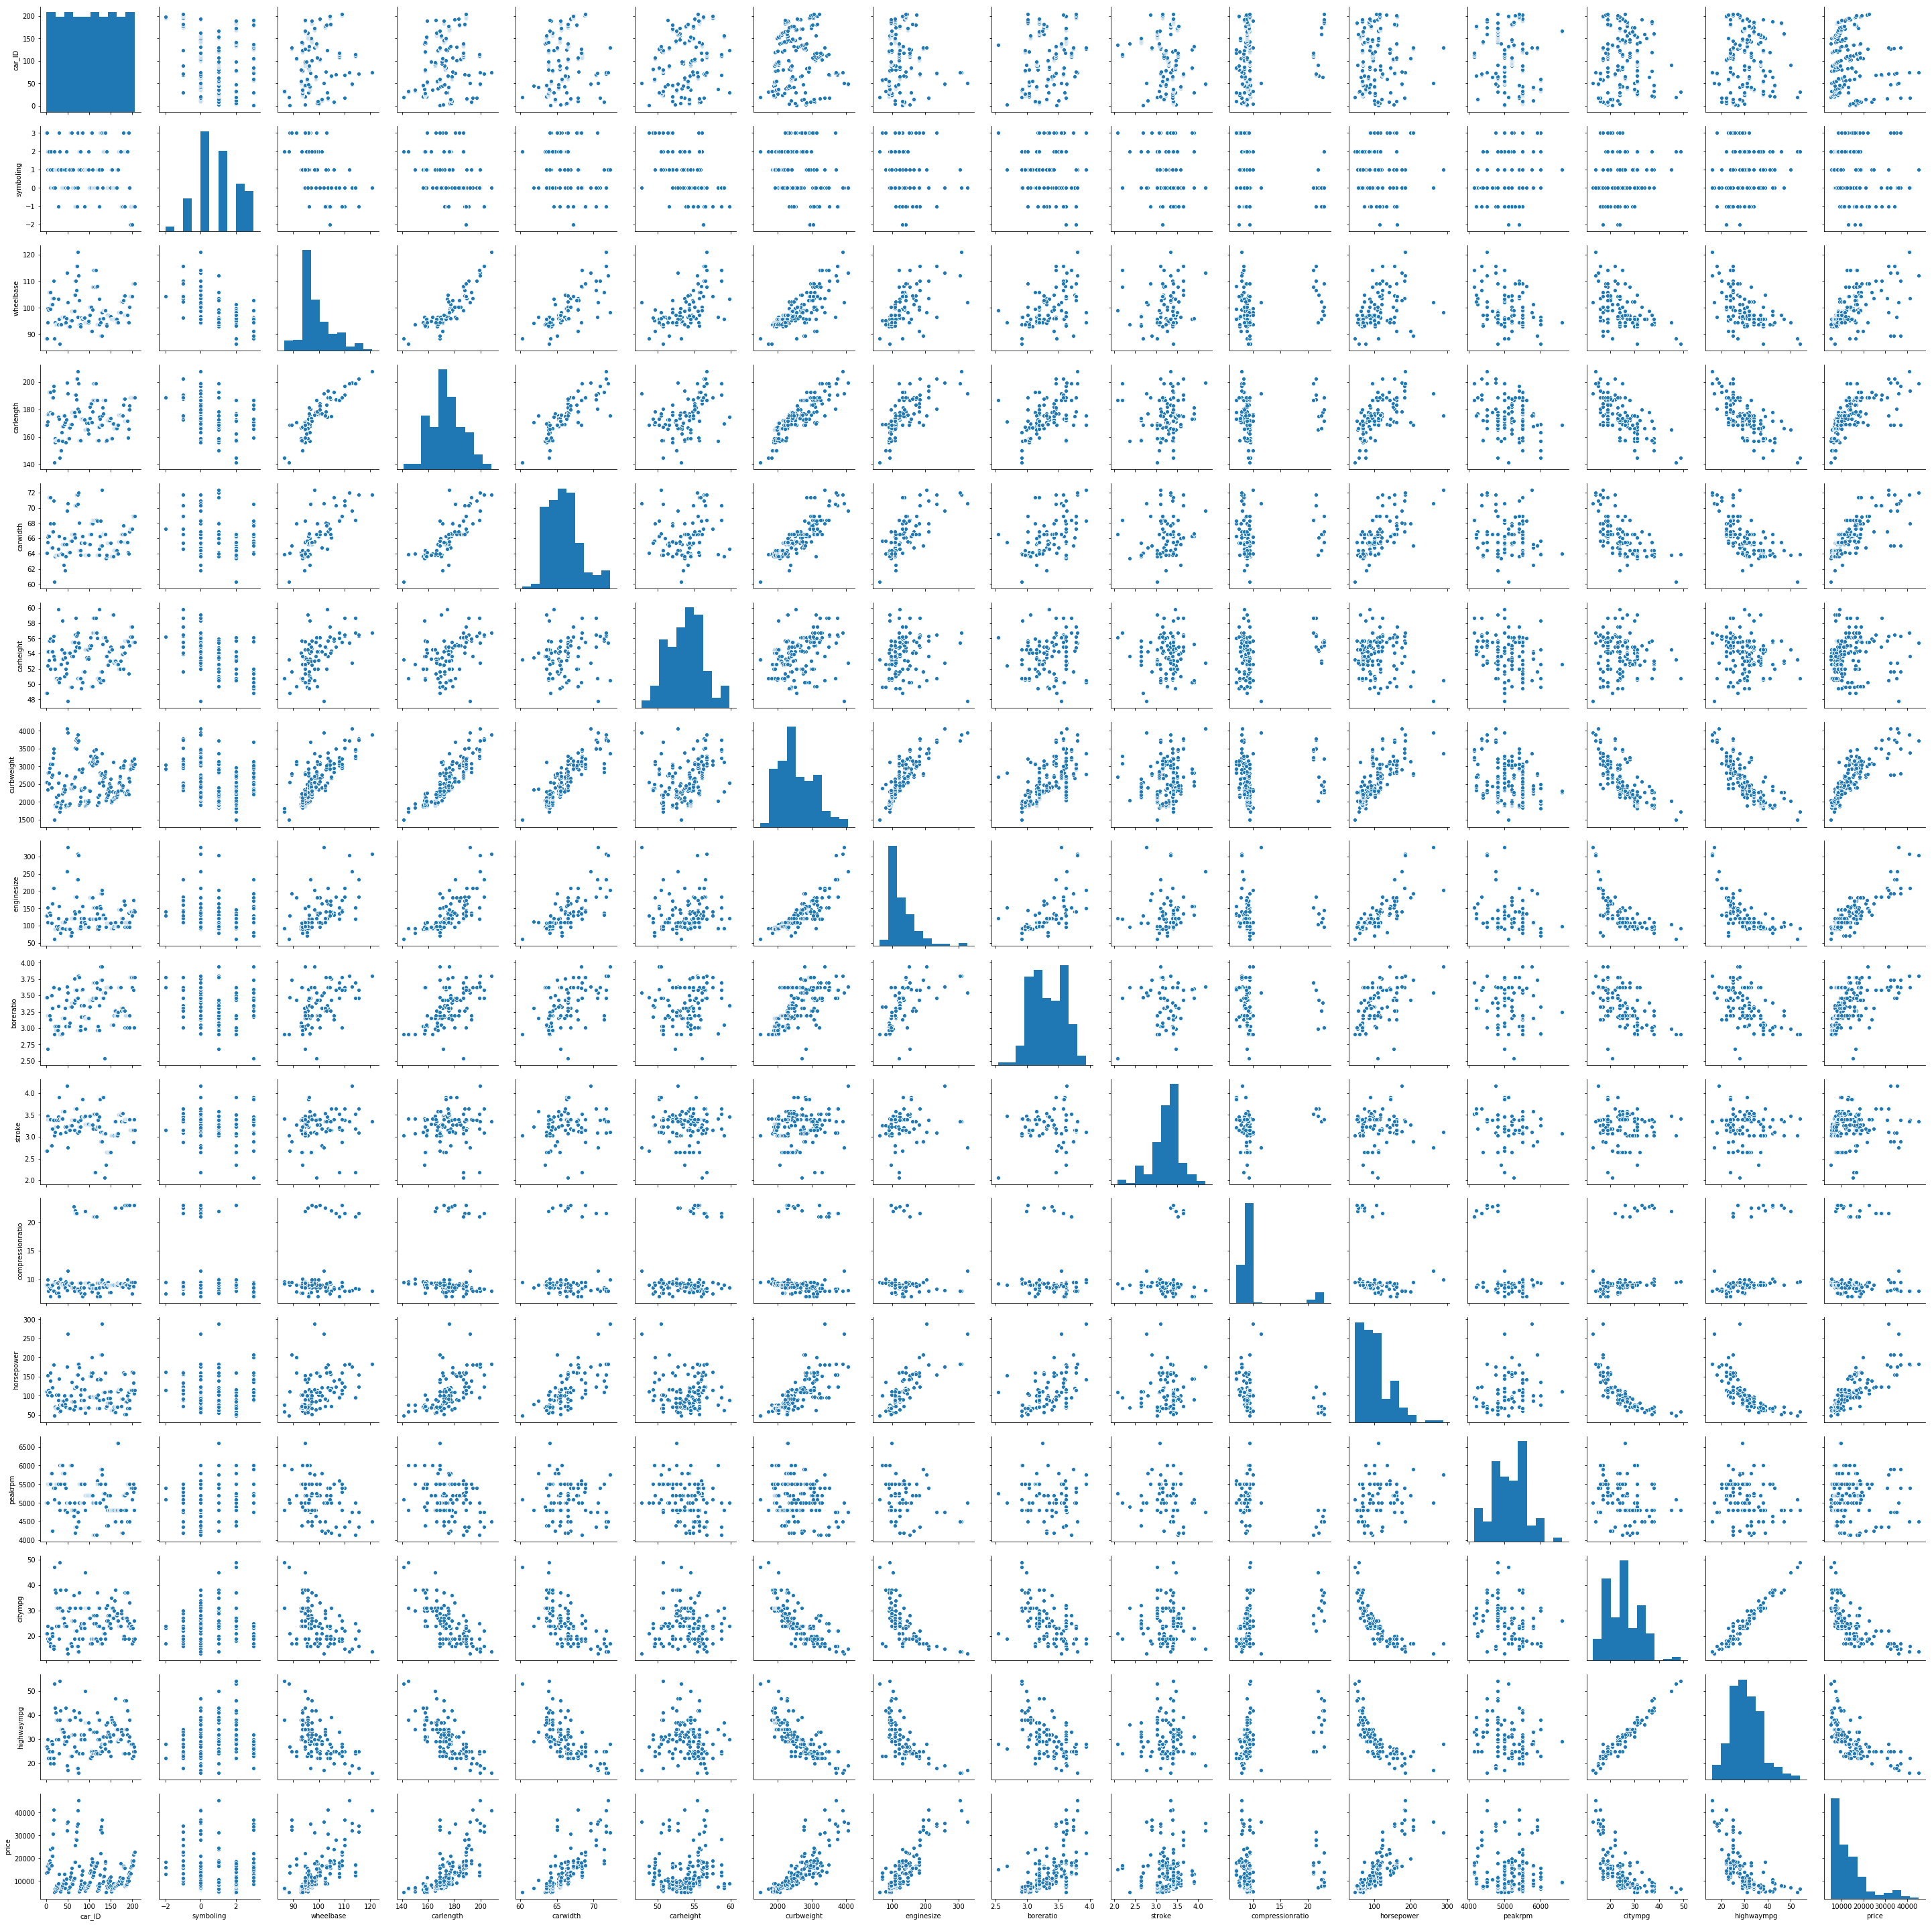

In [10]:
sns.pairplot(car)
plt.show()

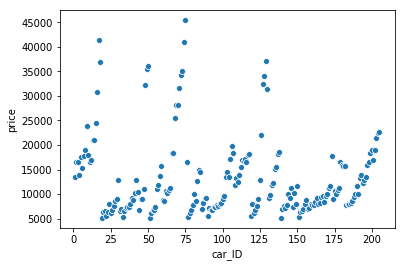

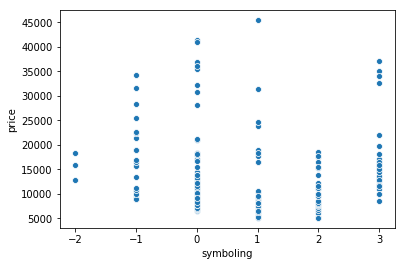

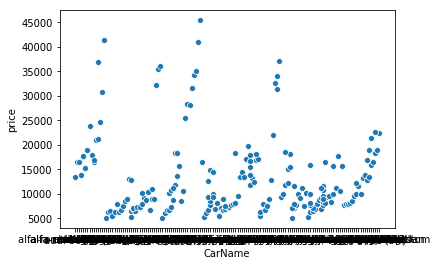

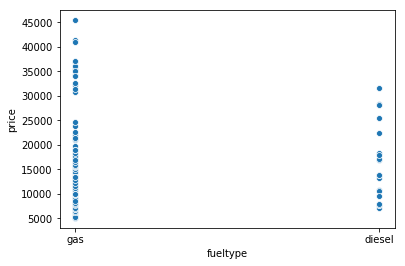

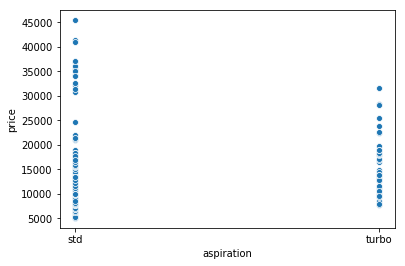

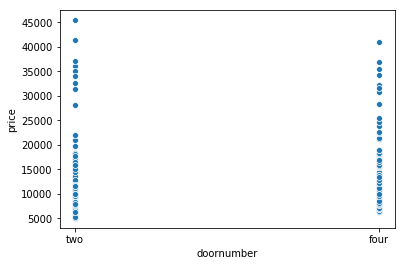

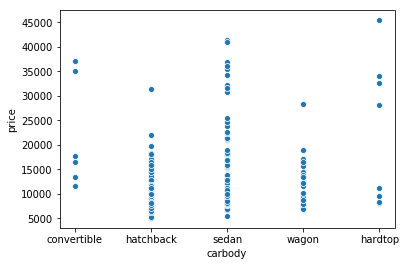

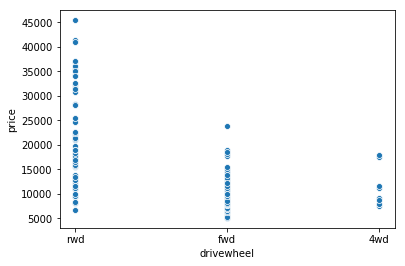

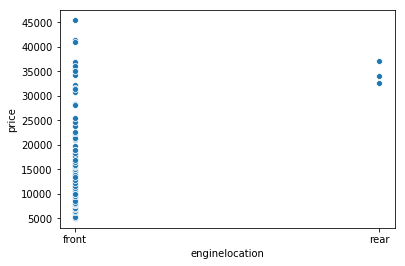

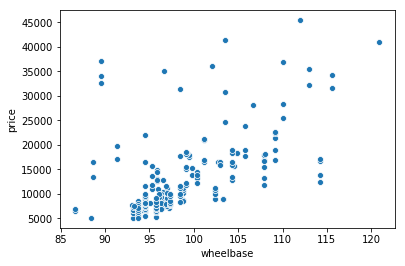

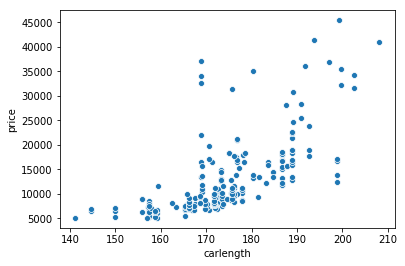

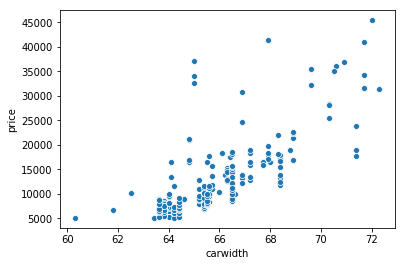

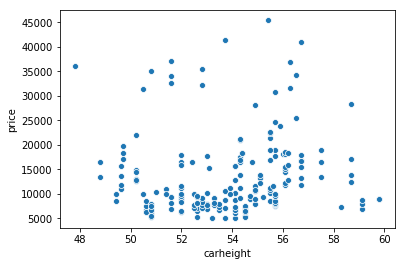

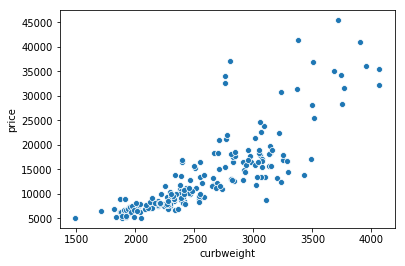

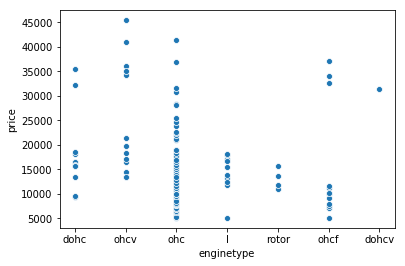

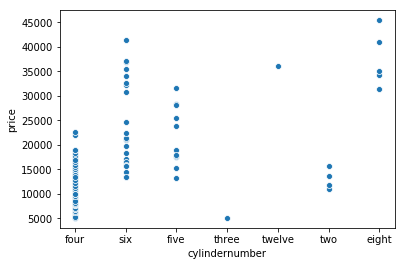

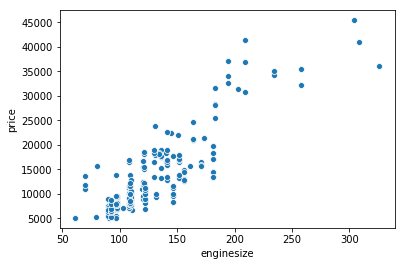

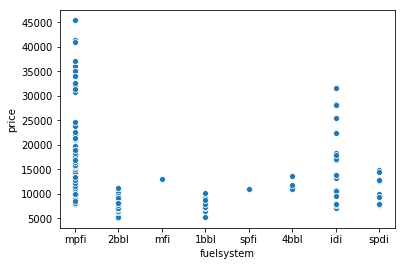

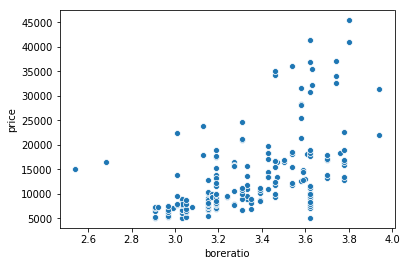

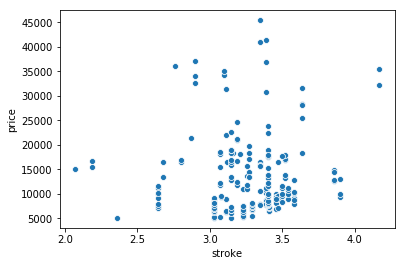

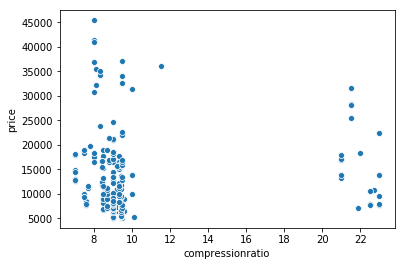

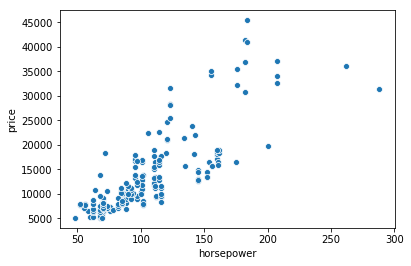

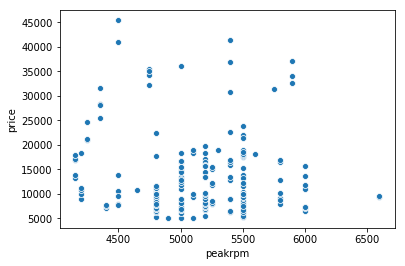

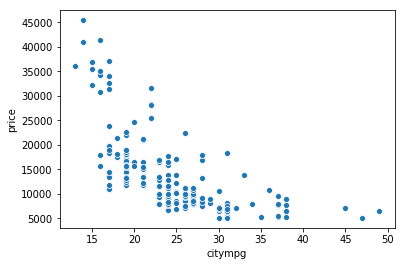

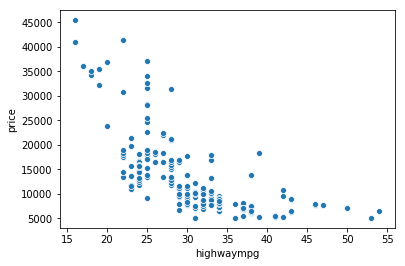

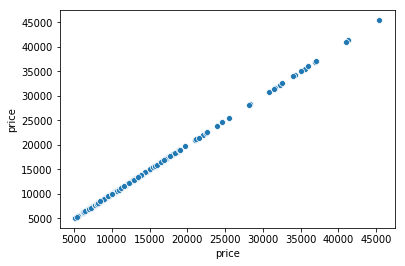

In [11]:
for i, col in enumerate (car.columns):
    plt.figure(i)
    sns.scatterplot(x=car[col],y=car['price'])

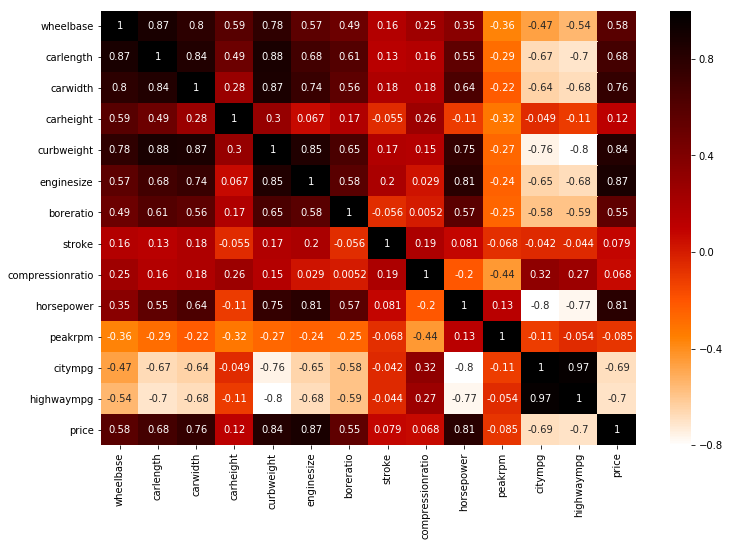

In [12]:
corr=cars.corr()  #corealtion with Dependent var and independent var's

plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap="gist_heat_r")

In [13]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [14]:
## car names only
carnames = car['CarName'].apply(lambda x: x.split(" ")[0])
carnames[:15]

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
Name: CarName, dtype: object

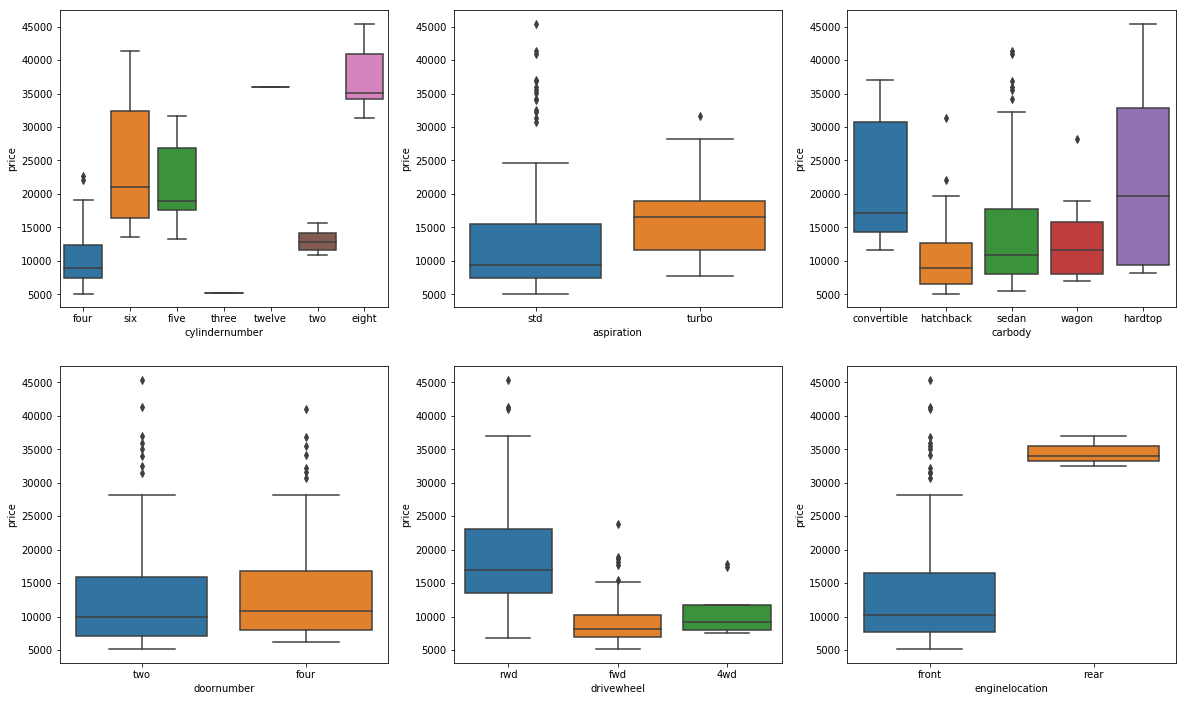

In [15]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car)
plt.subplot(2,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = car)
plt.subplot(2,3,3)
sns.boxplot(x = 'carbody', y = 'price', data = car)
plt.subplot(2,3,4)
sns.boxplot(x = 'doornumber', y = 'price', data = car)
plt.subplot(2,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = car)
plt.subplot(2,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = car)
plt.show()

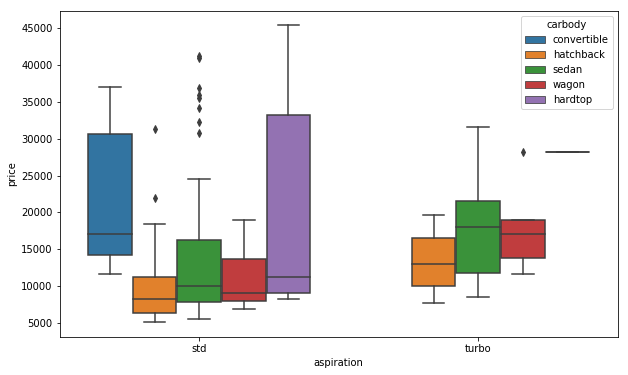

In [16]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'aspiration', y = 'price', hue = 'carbody',data = car)
plt.show()

In [17]:
car['drivewheel'] = car['drivewheel'].astype('object')
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [18]:
car['car_company']=carnames
car['car_company'].value_counts()


toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
volvo          11
peugeot        11
dodge           9
volkswagen      9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
vw              2
maxda           2
mercury         1
porcshce        1
toyouta         1
Nissan          1
vokswagen       1
Name: car_company, dtype: int64

In [19]:
#volkswagen
car.loc[(car['car_company']=="vw")|(car['car_company']=="vokswagen"),"car_company"]="volkswagen"

#porsche

car.loc[(car['car_company']=="porcshce"),"car_company"]="porsche"

#toyota
car.loc[(car['car_company']=="toyouta"),"car_company"]="toyota"

# nissan
car.loc[car['car_company'] == "Nissan", 'car_company'] = 'nissan'

# mazda
car.loc[car['car_company'] == "maxda", 'car_company'] = 'mazda'

car['car_company'].value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
renault         2
mercury         1
Name: car_company, dtype: int64

## 3.Data Preparation


In [20]:
x=car.drop(columns=['price',"car_ID"])
y=car['price']

In [21]:
y=car['price']
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [22]:
cars_categorical = x.select_dtypes(include=['object'])
cars_categorical.head()


,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_company
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [23]:
cars_dummies = pd.get_dummies(cars_categorical, drop_first=False)
cars_dummies.head()

,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
cars_dummies.head()

,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
x=x.drop(columns=cars_categorical)
x.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


In [26]:
x=pd.concat([x,cars_dummies],axis=1)
x.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,0,0,0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Columns: 210 entries, symboling to car_company_volvo
dtypes: float64(7), int64(7), uint8(196)
memory usage: 61.7 KB


In [28]:
x.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       ...
       'car_company_nissan', 'car_company_peugeot', 'car_company_plymouth',
       'car_company_porsche', 'car_company_renault', 'car_company_saab',
       'car_company_subaru', 'car_company_toyota', 'car_company_volkswagen',
       'car_company_volvo'],
      dtype='object', length=210)

## 4: Splitting the Data into Training and Testing Sets


In [29]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
x_train, y_test = train_test_split(cars, train_size = 0.7, test_size = 0.3, random_state = 100)

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler = MinMaxScaler()

In [32]:
num_vars = ['curbweight','carlength','enginesize','horsepower','price']

x_train[num_vars] = scaler.fit_transform(x_train[num_vars])

In [33]:
x_train.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
122,plymouth fury gran sedan,gas,std,four,sedan,fwd,front,93.7,0.426016,63.8,...,0.139623,2bbl,2.97,3.23,9.4,0.083333,5500,31,38,0.068818
125,porsche macan,gas,std,two,hatchback,rwd,front,94.5,0.452033,68.3,...,0.339623,mpfi,3.94,3.11,9.5,0.395833,5500,19,27,0.466890
166,toyota corolla tercel,gas,std,two,hatchback,rwd,front,94.5,0.448780,64.0,...,0.139623,mpfi,3.24,3.08,9.4,0.266667,6600,26,29,0.122110
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,0.450407,64.1,...,0.260377,mpfi,3.47,2.68,9.0,0.262500,5000,21,27,0.314446
199,volvo diesel,gas,turbo,four,wagon,rwd,front,104.3,0.775610,67.2,...,0.260377,mpfi,3.62,3.15,7.5,0.475000,5100,17,22,0.382131


In [34]:
x_train.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,98.523077,0.525476,65.839860,53.551748,0.407878,0.241351,3.307413,3.250070,10.052587,0.227302,5130.069930,25.391608,30.874126,0.219310
std,5.961835,0.204848,2.214203,2.433766,0.211269,0.154619,0.260997,0.312529,3.794890,0.165511,481.273979,6.701939,6.973660,0.215682
min,86.600000,0.000000,60.300000,47.800000,0.000000,0.000000,2.680000,2.190000,7.000000,0.000000,4150.000000,13.000000,17.000000,0.000000
25%,94.500000,0.399187,63.950000,51.800000,0.245539,0.135849,3.065000,3.110000,8.600000,0.091667,4800.000000,19.000000,25.000000,0.067298
50%,96.500000,0.502439,65.400000,53.700000,0.355702,0.184906,3.310000,3.270000,9.000000,0.191667,5200.000000,25.000000,31.000000,0.140343
75%,101.200000,0.669919,66.900000,55.350000,0.559542,0.301887,3.540000,3.400000,9.400000,0.283333,5500.000000,31.000000,36.500000,0.313479
max,115.600000,1.000000,72.300000,59.100000,1.000000,1.000000,3.940000,4.170000,23.000000,1.000000,6600.000000,49.000000,54.000000,1.000000


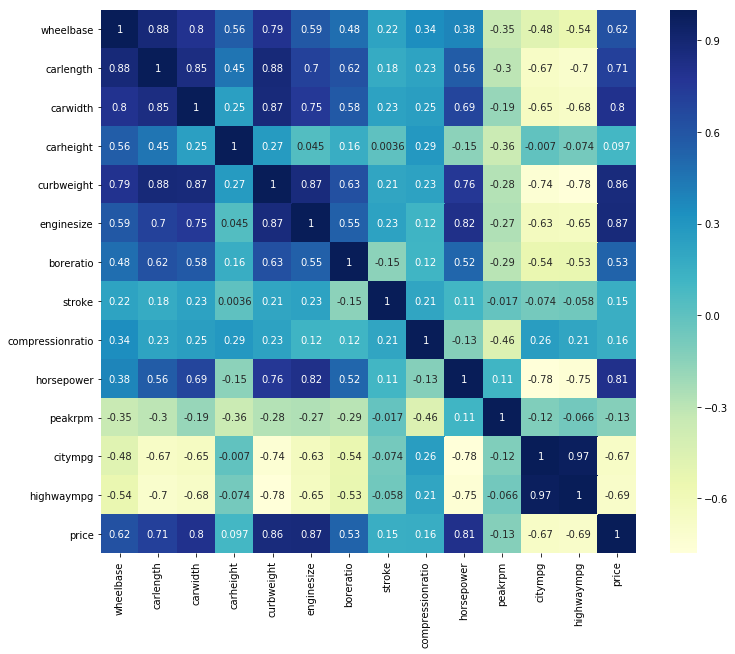

In [35]:
plt.figure(figsize = (12, 10))
sns.heatmap(x_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

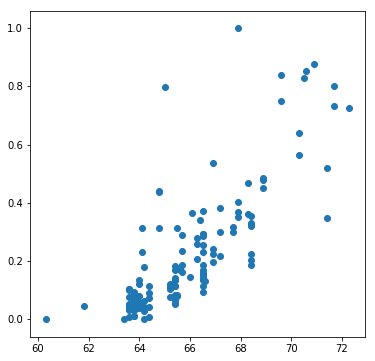

In [36]:
plt.figure(figsize=[6,6])
plt.scatter(x_train.carwidth, x_train.price)
plt.show()

In [44]:
y_train = x_train.pop('wheelbase')
x_train = x_train

In [45]:
import statsmodels.api as sm

# Add a constant
x_train_lm = sm.add_constant(x_train[['carlength']])

# Create a first fitted model
lr = sm.OLS(y_train, x_train_lm).fit()

In [46]:
lr.params

const        85.096919
carlength    25.550462
dtype: float64

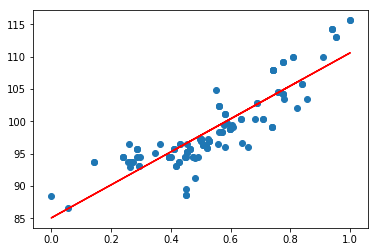

In [47]:
plt.scatter(x_train_lm.iloc[:, 1], y_train)
plt.plot(x_train_lm.iloc[:, 1], 85.09+ 25.5*x_train_lm.iloc[:, 1], 'r')
plt.show()

In [48]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              wheelbase   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     474.0
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           6.13e-47
Time:                        15:11:06   Log-Likelihood:                -352.41
No. Observations:                 143   AIC:                             708.8
Df Residuals:                     141   BIC:                             714.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.0969      0.662    128.624      0.0

In [49]:
x_train_lm = x_train[['carlength', 'carwidth']]

In [50]:
import statsmodels.api as sm
x_train_lm = sm.add_constant(x_train_lm)

lr = sm.OLS(y_train, x_train_lm).fit()

lr.params

const        53.877754
carlength    20.871260
carwidth      0.511513
dtype: float64

In [51]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              wheelbase   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     249.6
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           6.85e-47
Time:                        15:11:08   Log-Likelihood:                -349.14
No. Observations:                 143   AIC:                             704.3
Df Residuals:                     140   BIC:                             713.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.8778     12.220      4.409      0.0

In [52]:
x_train_lm = x_train[['carlength', 'carwidth','carheight']]

In [53]:
import statsmodels.api as sm
x_train_lm = sm.add_constant(x_train_lm)

lr = sm.OLS(y_train, x_train_lm).fit()

lr.params

const         2.070431
carlength    14.465968
carwidth      0.846456
carheight     0.618478
dtype: float64

In [54]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              wheelbase   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     221.7
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           9.02e-53
Time:                        15:11:11   Log-Likelihood:                -332.21
No. Observations:                 143   AIC:                             672.4
Df Residuals:                     139   BIC:                             684.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0704     13.819      0.150      0.8

In [55]:
cars.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [56]:
car.car_company.describe()

count        205
unique        22
top       toyota
freq          32
Name: car_company, dtype: object

In [57]:
car.price.describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

Text(0, 0.5, 'Avg Price (Dollars)')

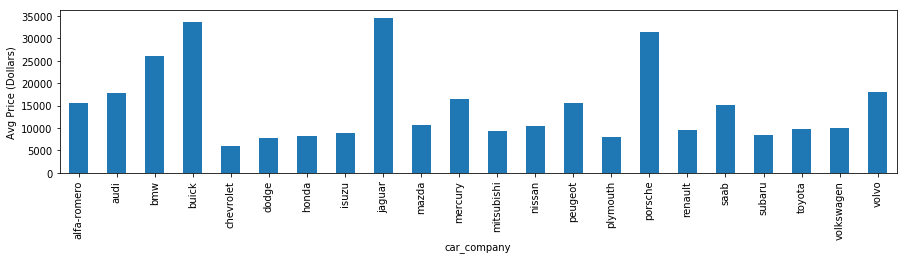

In [58]:
car_cmp_avg_price = car[['car_company','price']].groupby("car_company", as_index = False).mean().rename(columns={'price':'CompanyName_avg_price'})
plt = car_cmp_avg_price.plot(x = 'car_company', kind='bar',legend = False, sort_columns = True, figsize = (15,3))
plt.set_xlabel("car_company")
plt.set_ylabel("Avg Price (Dollars)")

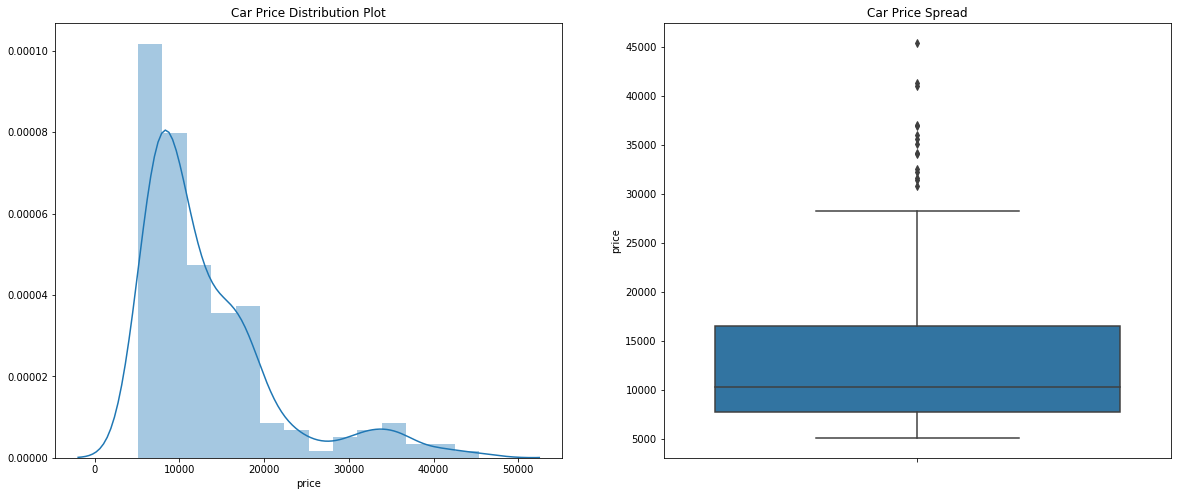

In [59]:
from matplotlib import *
import sys
import pylab as pl
pl.figure(figsize=(20,8))

pl.subplot(1,2,1)
pl.title('Car Price Distribution Plot')
sns.distplot(car.price)

pl.subplot(1,2,2)
pl.title('Car Price Spread')
sns.boxplot(y=car.price)

pl.show()

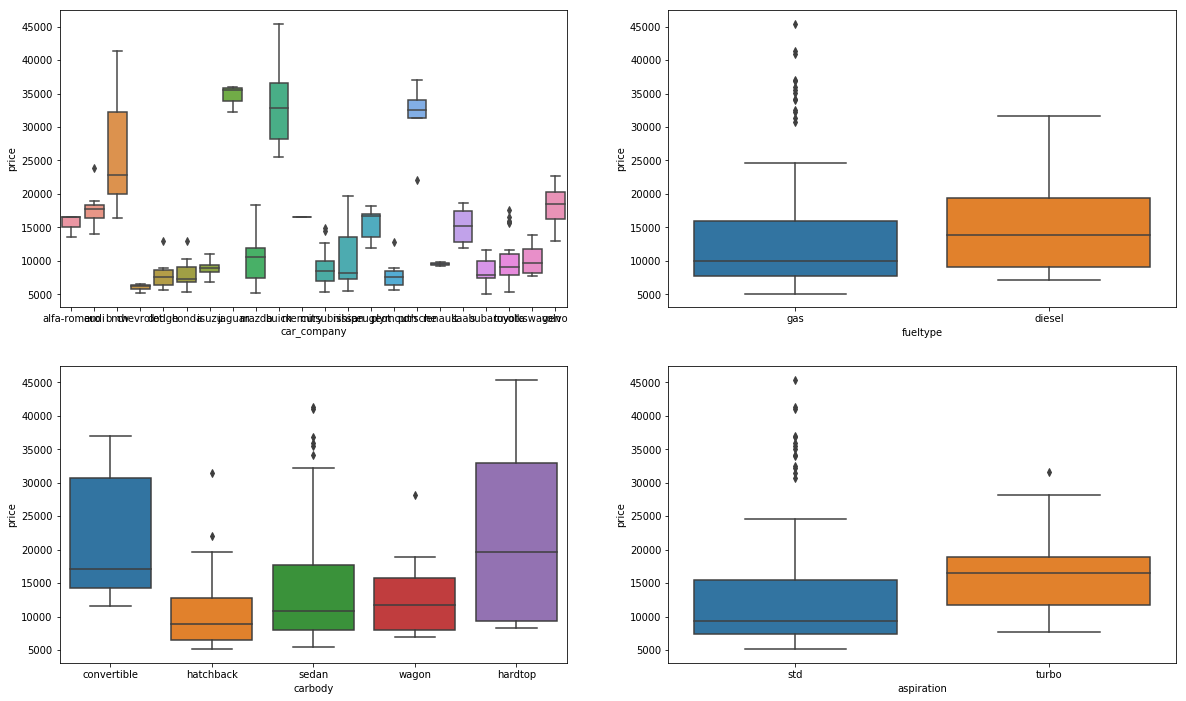

In [60]:
pl.figure(figsize=(20, 12))
pl.subplot(2,2,1)
sns.boxplot(x = 'car_company', y = 'price', data = car)
pl.subplot(2,2,2)
sns.boxplot(x = 'fueltype', y = 'price', data = car)
pl.subplot(2,2,3)
sns.boxplot(x = 'carbody', y = 'price', data = car)
pl.subplot(2,2,4)
sns.boxplot(x = 'aspiration', y = 'price', data = car)

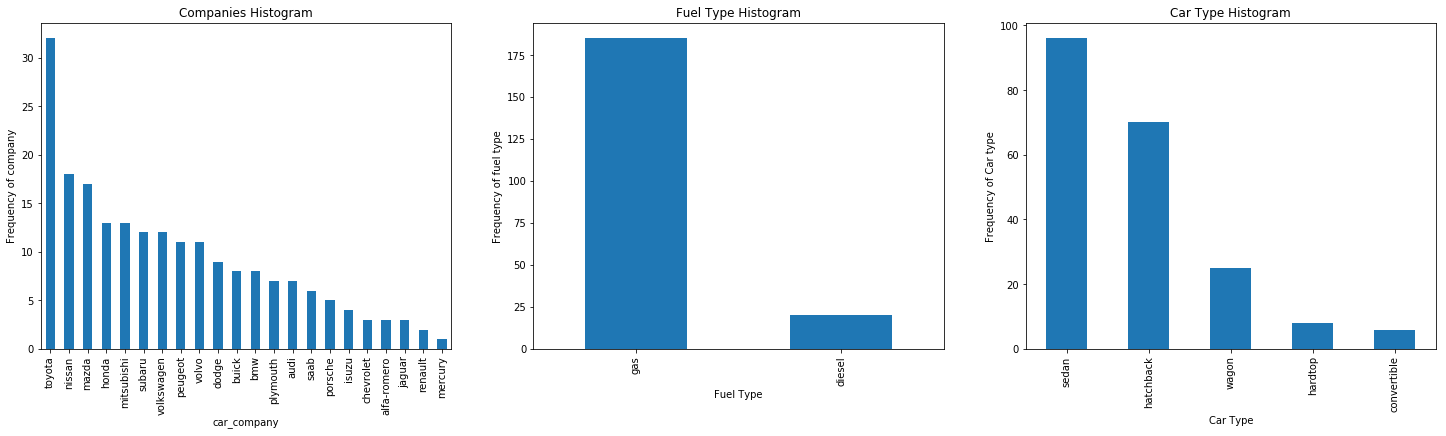

In [61]:
pl.figure(figsize=(25, 6))
pl.subplot(1,3,1)
pl1 = car.car_company.value_counts().plot(kind='bar')
pl.title('Companies Histogram')
pl1.set(xlabel = 'car_company', ylabel='Frequency of company')
pl.subplot(1,3,2)
pl1 = car.fueltype.value_counts().plot(kind='bar')
pl.title('Fuel Type Histogram')
pl1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')
pl.subplot(1,3,3)
pl1 = car.carbody.value_counts().plot(kind='bar')
pl.title('Car Type Histogram')
pl1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')
pl.show()

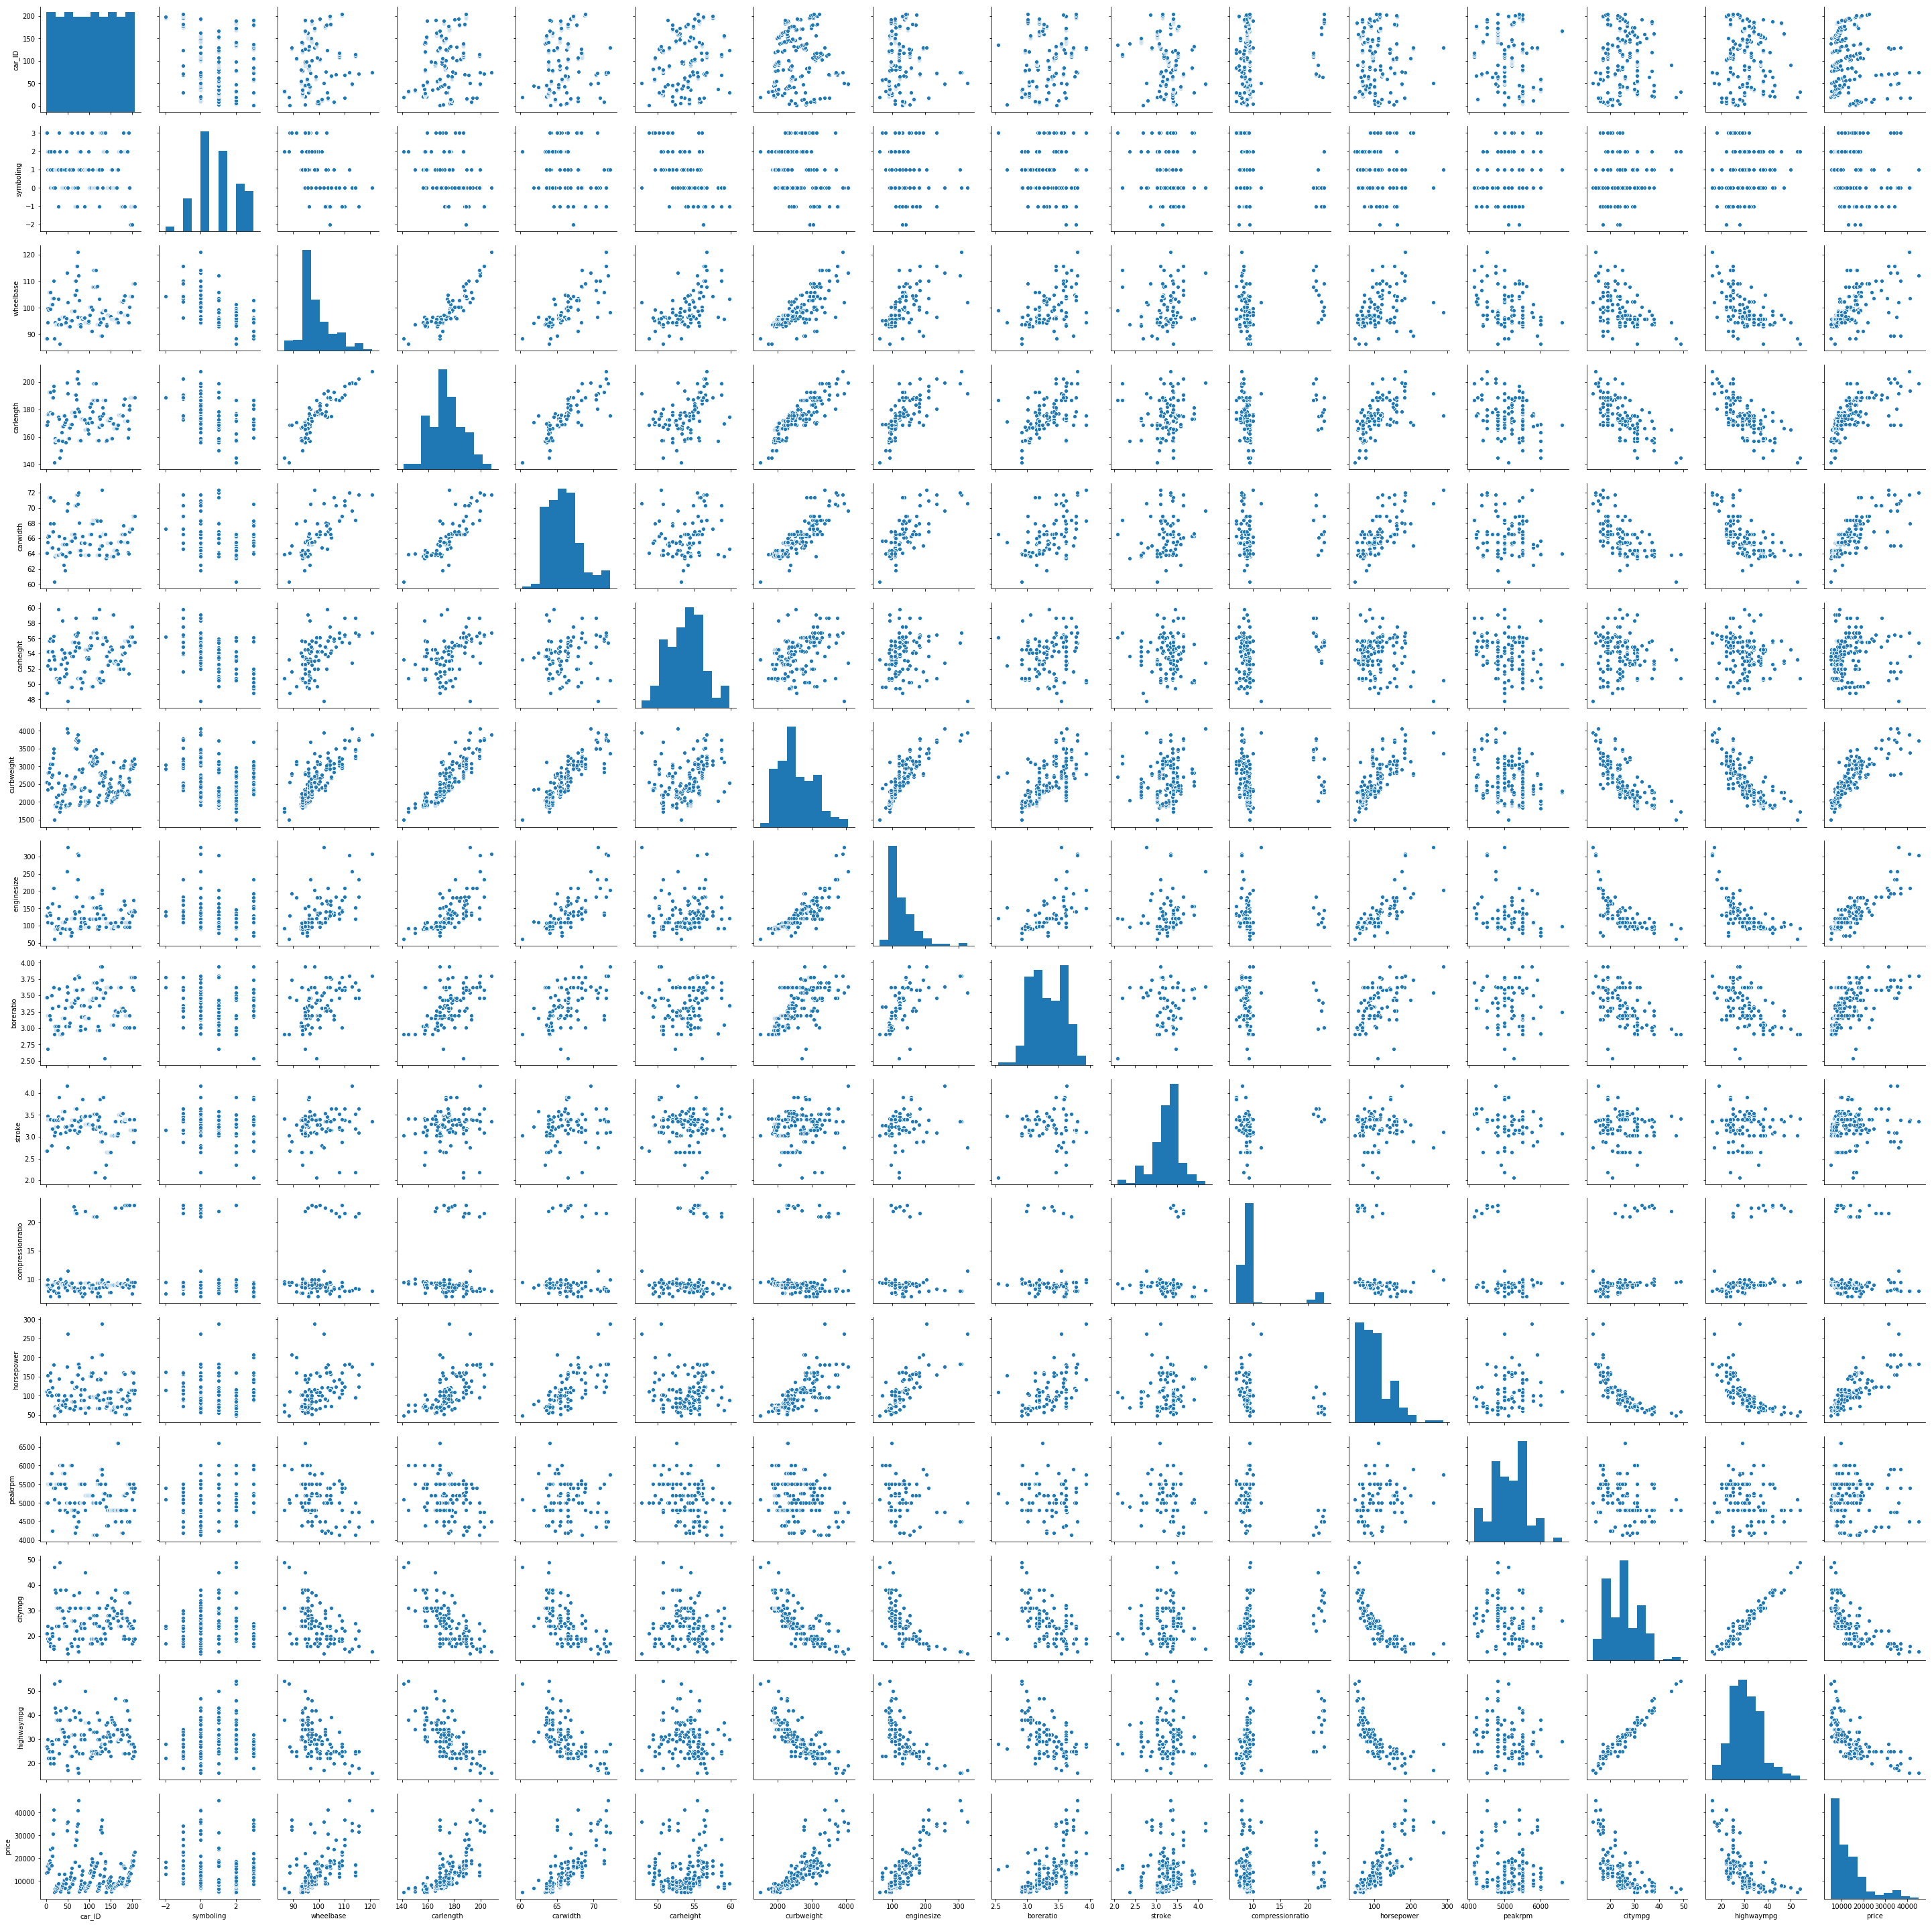

In [62]:
sns.pairplot(car)
pl.show()

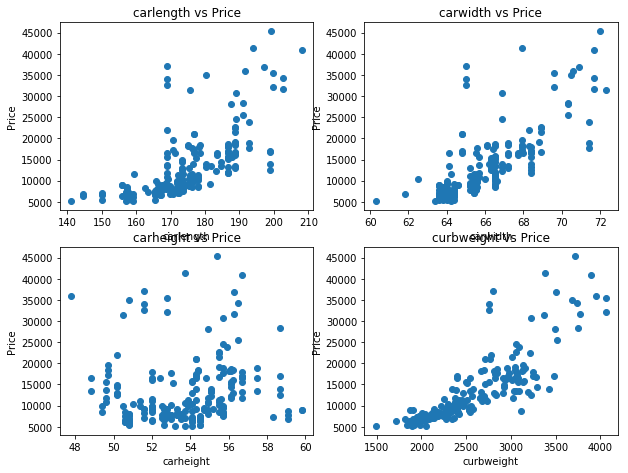

In [63]:
def scatter(x,fig):
    pl.subplot(5,2,fig)
    pl.scatter(car[x],car['price'])
    pl.title(x+' vs Price')
    pl.ylabel('Price')
    pl.xlabel(x)
pl.figure(figsize=(10,20))
scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

In [64]:
car_lr = car[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase','curbweight', 'enginetype',
                'cylindernumber', 'enginesize', 'boreratio','horsepower',  'carlength','carwidth']]
car_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth
0,13495.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1
1,16500.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1
2,16500.0,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,171.2,65.5
3,13950.0,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,176.6,66.2
4,17450.0,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,176.6,66.4


# Dummy variables

In [65]:
status = pd.get_dummies(car['cylindernumber'])
status.head()

,eight,five,four,six,three,twelve,two
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0


In [66]:
status = pd.get_dummies(car['cylindernumber'], drop_first = True)
car= pd.concat([car, status], axis = 1)
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,citympg,highwaympg,price,car_company,five,four,six,three,twelve,two
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,21,27,13495.0,alfa-romero,0,1,0,0,0,0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,21,27,16500.0,alfa-romero,0,1,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,19,26,16500.0,alfa-romero,0,0,1,0,0,0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,24,30,13950.0,audi,0,1,0,0,0,0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,18,22,17450.0,audi,1,0,0,0,0,0


In [67]:
y_train = x_train.pop('price')
X_train = x_train

# Model building

In [68]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train[['horsepower']])
lr = sm.OLS(y_train, X_train_lm).fit()

In [69]:
lr.params

const        -0.019484
horsepower    1.050556
dtype: float64

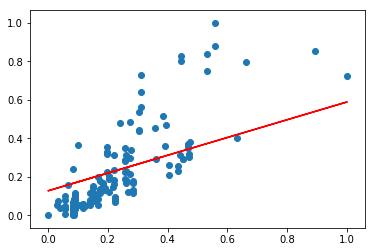

In [70]:
pl.scatter(X_train_lm.iloc[:, 1], y_train)
pl.plot(X_train_lm.iloc[:, 1], 0.127 + 0.462*X_train_lm.iloc[:, 1], 'r')
pl.show()

In [71]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     261.8
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           6.04e-34
Time:                        15:12:02   Log-Likelihood:                 91.997
No. Observations:                 143   AIC:                            -180.0
Df Residuals:                     141   BIC:                            -174.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0195      0.018     -1.068      0.2

In [72]:
X_train_lm = X_train[['horsepower', 'boreratio']]

In [73]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const        -0.427726
horsepower    0.943668
boreratio     0.130778
dtype: float64

In [74]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     141.0
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           2.86e-34
Time:                        15:12:03   Log-Likelihood:                 95.839
No. Observations:                 143   AIC:                            -185.7
Df Residuals:                     140   BIC:                            -176.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4277      0.148     -2.892      0.0

In [75]:
X_train_lm = X_train[['horsepower', 'boreratio','stroke']]

In [76]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const        -0.744309
horsepower    0.908106
boreratio     0.156044
stroke        0.074184
dtype: float64

In [77]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     98.00
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           3.95e-34
Time:                        15:12:03   Log-Likelihood:                 98.192
No. Observations:                 143   AIC:                            -188.4
Df Residuals:                     139   BIC:                            -176.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7443      0.207     -3.595      0.0

# Checking VIF
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:

𝑉𝐼𝐹𝑖=1/1−𝑅𝑖2

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [80]:
X_train_new = build_model(X_train_lm,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     98.00
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           3.95e-34
Time:                        15:12:04   Log-Likelihood:                 98.192
No. Observations:                 143   AIC:                            -188.4
Df Residuals:                     139   BIC:                            -176.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7443      0.207     -3.595      0.0

In [81]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     98.00
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           3.95e-34
Time:                        15:12:04   Log-Likelihood:                 98.192
No. Observations:                 143   AIC:                            -188.4
Df Residuals:                     139   BIC:                            -176.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7443      0.207     -3.595      0.0

In [82]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     98.00
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           3.95e-34
Time:                        15:12:04   Log-Likelihood:                 98.192
No. Observations:                 143   AIC:                            -188.4
Df Residuals:                     139   BIC:                            -176.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7443      0.207     -3.595      0.0

In [83]:
checkVIF(X_train_new)

,Features,VIF
0,const,401.88
2,boreratio,1.45
1,horsepower,1.44
3,stroke,1.08


In [84]:
X_train_new = X_train_new.drop(["stroke"], axis = 1)

In [85]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     141.0
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           2.86e-34
Time:                        15:12:04   Log-Likelihood:                 95.839
No. Observations:                 143   AIC:                            -185.7
Df Residuals:                     140   BIC:                            -176.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4277      0.148     -2.892      0.0

In [86]:
checkVIF(X_train_new)

,Features,VIF
0,const,199.87
1,horsepower,1.37
2,boreratio,1.37


# Residual analysis of a model

In [87]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

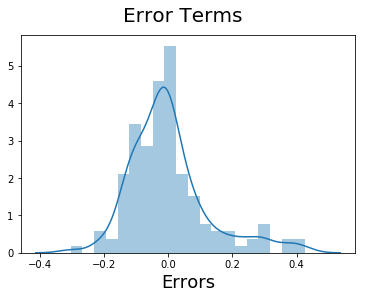

In [88]:
fig = pl.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
pl.xlabel('Errors', fontsize = 18) 

# Model evaluation

In [159]:
car=pd.read_csv('C:/Users/User/Desktop/datascience/carprice.csv')
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [160]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
x_train, y_test = train_test_split(cars, train_size = 0.7, test_size = 0.3, random_state = 100)

In [161]:
from sklearn.preprocessing import MinMaxScaler

In [162]:
scaler = MinMaxScaler()

In [163]:
num_vars = ['curbweight','carlength','enginesize','horsepower','price','carwidth']

x_train[num_vars] = scaler.fit_transform(x_train[num_vars])

In [164]:
y_test = x_train.pop('price')
X_test = x_train

In [165]:
X_train_new = X_train_lm.drop('stroke',axis=1)
X_test_new = X_test[X_train_new.columns]
X_test_new = sm.add_constant(X_test_new)

In [166]:
y_pred = lm.predict(X_test_new)

In [167]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.6682475689627897

Text(0, 0.5, 'y_pred')

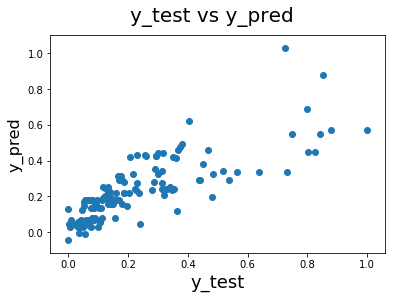

In [168]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16) 

In [169]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     141.0
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           2.86e-34
Time:                        15:45:35   Log-Likelihood:                 95.839
No. Observations:                 143   AIC:                            -185.7
Df Residuals:                     140   BIC:                            -176.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4277      0.148     -2.892      0.0